Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = ""
COLLABORATORS = ""

---

# HPC/QC Architectures: Think In Quantum

<div class="alert alert-block alert-success">
<h3>Quantum Programming requires us to think "out-of-the-box" and get a feeling for the quantum effects. Learning Quantum Programming can not be done by looking at circuits, just as any regular programming language can not be learned by reading a book alone. It is crucial to use the language and use it to solve real problems.
</h3>
</div>

**Outline:**

Part 1 - Basics
1. Encoding of information (Integers)
2. Simple Quantum Arithmetic (Increment, Decrement, Add)
3. Conditional Quantum Operations
4. Uncomputing
5. Phase Encoding

Part 2 - Toolbox (subject to change!)
1. Ampltiude and phase logic 
2. Amplitude Amplification
3. Quantum Fourier Transform
4. HHL Linear Equation Solver

Part 3 - Solving real (toy) problems
1. ...to be defined.

## Encoding Integers
Integers can be encoded in base 2 using a simple scheme. In our examples we are using "nibbles" (4-bit-numbers), common ones are 16, 32 or 64 bits. More information can be found in any CS textbook or [Wikipedia - Binary Numbers](https://en.wikipedia.org/wiki/Binary_number).

A nibble consists of four bits that can have value 0 or 1. 

**Examples:**
|  Binary | Decimal | Calculation |
|---|---|----|
| 0000 | 0 | $0\cdot 2^3 + 0\cdot 2^2 + 0\cdot 2^1 + 0\cdot 2^0$ | 
| 0001 | 1 | $0\cdot 2^3 + 0\cdot 2^2 + 0\cdot 2^1 + 1\cdot 2^0$ |
| 0010 | 2 | $0\cdot 2^3 + 0\cdot 2^2 + 1\cdot 2^1 + 0\cdot 2^0$ |
| 0011 | 3 | $0\cdot 2^3 + 0\cdot 2^2 + 1\cdot 2^1 + 1\cdot 2^0$ |


  <!--
$$
\begin{array}{l c c c c r}
& & & & & \text{Value} \\
2^n & 2^3 & 2^2 & 2^1 & 2^0 & \\
& 8 & 4 & 2 & 1 &\\
\hline
\text{Nibble} & 1 & 0 & 0 & 1 & \\
\hline
\text{Calc.} & 1\cdot 2^3 & +0\cdot 2^2 & +0\cdot 2^1 & +1\cdot 2^0 & = 9\\
& & & & & \\
\hline
\text{Nibble} & 1 & 1 & 1 & 1 & \\
\hline
\text{Calc.} & 1\cdot 2^3 & +1\cdot 2^2 & +1\cdot 2^1 & +1\cdot 2^0 & = 15\\
& & & & & \\
\hline
\text{Nibble} & 0 & 0 & 0 & 0 & \\
\hline
\text{Calc.} & 0\cdot 2^3 & +0\cdot 2^2 & +0\cdot 2^1 & +0\cdot 2^0 & = 0\\
\end{array}
$$-->

### Negative Values
Negative values can be represented using the so-called [Two's Complement](https://en.wikipedia.org/wiki/Two%27s_complement). This splits the available range by using half of the range for negativ and half for positive integers.

**The first bit is used to indicate the sign (1 is negative, 0 is positive)**. 

**Examples**:

|  Binary | Decimal | Calculation |
|---|---|----|
| 0010 | 2  | $-0\cdot 2^3 + 0\cdot 2^2 + 1\cdot 2^1 + 0\cdot 2^0$ |
| 0100 | 4 | $-0\cdot 2^3 + 1\cdot 2^2 + 0\cdot 2^1 + 0\cdot 2^0$ |
| 0111 | 7  | $-0\cdot 2^3 + 0\cdot 2^2 + 0\cdot 2^1 + 0\cdot 2^0$ (highest number representable) |
| 1000 | -8 | $-1\cdot 2^3 + 0\cdot 2^2 + 0\cdot 2^1 + 0\cdot 2^0$ (lowest number representable) |
| 1100 | -4 | $-1\cdot 2^3 + 1\cdot 2^2 + 0\cdot 2^1 + 0\cdot 2^0$ |
| 1010 | -6 | $-1\cdot 2^3 + 0\cdot 2^2 + 1\cdot 2^1 + 0\cdot 2^0$ |
| 1001 | -7 | $-1\cdot 2^3 + 0\cdot 2^2 + 0\cdot 2^1 + 1\cdot 2^0$ | 
| 1111 | -1 | $-1\cdot 2^3 + 1\cdot 2^2 + 1\cdot 2^1 + 1\cdot 2^0$ |



### Ranges
Only a certain range of numbers can be represented with a fixed amount of bits. 

* "unsigned" integers can represent only positive numbers using the full range
* "signed" integers use Two's Complement and represent half of the range for both signs (negative and positive)

**Examples for integer representations:**
* $4: 2^3 + 2^2 + 2^1 + 2^0 = 15$ &rightarrow; known as half-octets or nibbles
* $8: 2^7 + 2^6 + 2^5 + 2^4 + 2^3 + 2^2 + 2^1 + 2^0 = 255$ &rightarrow; might be familiar from ASCII encoding of (western) alphabet
* $16: 2^15 + ... \ldots = 65~535$
* $32: 2^31 + \ldots = 4~294~967~295$ 

<div class="alert alert-block alert-info">
<h3>Exercise 1</h3>
    <p>1.1 Get familiar with the representation using pen&paper and calculate the following integer <b>unsigned</b> values:</p>
    <ul>
        <li>1010</li>
        <li>0010</li>
        <li>0111</li>
    </ul>
    <p>1.2 Get familiar with the representation using pen&paper and calculate the following integer <b>signed</b> values using Two's Complement:</p>
    <ul>
        <li>1011</li>
        <li>1101</li>
        <li>1111</li>
    </ul>
    <p>1.3 What is the binary representation (unsigned) of</p>
    <ul>
        <li>4</li>
        <li>8</li>
        <li>14</li>
    </ul>
    <p>1.4 [Advanced] Create a Python function to convert between binary and integer representation</p>
    <ul>
        <li>Tip: Check bitwise operators: https://wiki.python.org/moin/BitwiseOperators</li>
    </ul>
</div>

In [2]:
def convert_to_int(bitstring):
    ### BEGIN SOLUTION ###
    val = 0
    # reverse string to account for endianess
    reversed_str = reversed(bitstring)

    # loop over 
    for i, x in enumerate(reversed_str):
        val = val + (int(x) << i)

    return val
    ### END SOLUTION ###

assert convert_to_int("1101") == 13
assert convert_to_int("1111") == 15
assert convert_to_int("0000") == 0
assert convert_to_int("11111111") == 255

In [3]:
def convert_to_int_oneline(bitstring):
    ### BEGIN SOLUTION ###
    return sum([int(x)<<i for i,x in enumerate(reversed(bitstring))])
    ### END SOLUTION ###

<div class="alert alert-block alert-warning">
<h3>Important: All of the following examples will use unsigned integers if not indicated otherwise!</h3>
</div>

## Arithmetic Operations: Increment and Decrement

Simular to classic logic, the arithmetic operations can be implemented on the (q)bit register using NOT and Controlled-NOT operations.

The following example shows an incrementor adding +1 to our value.

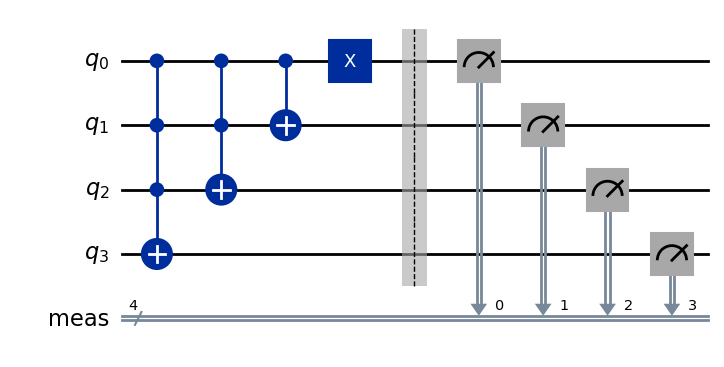

In [4]:
from qiskit.circuit.library.standard_gates import C3XGate
from qiskit import QuantumCircuit, Aer
from qiskit.visualization import plot_histogram

# Initialize circuit as 0000 = 0
spi = QuantumCircuit(4)

# Implement incrementor
spi.append(C3XGate(), [0,1,2,3])
spi.ccx(0,1,2)
spi.cx(0, 1)
spi.x(0)

# Measure
spi.measure_all()
spi.draw(output="mpl", style="iqp")

The result should increment the value from 0 to 1 (or 0000 to 0001 in binary)

In [5]:
simulator = Aer.get_backend('aer_simulator')
result = simulator.run(spi, shots=1).result()
result.get_counts()

{'0001': 1}

#### Another example starting at value 0001 (1)

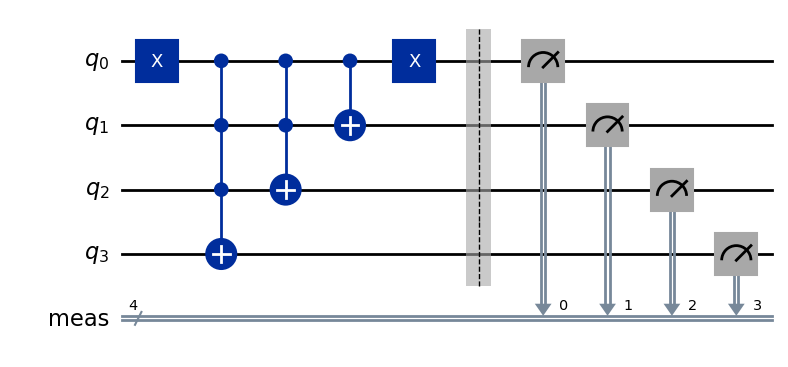

In [6]:
from qiskit.circuit.library.standard_gates import C3XGate
from qiskit import QuantumCircuit, Aer
from qiskit.visualization import plot_histogram

# Initialize circuit as 0001 = 1
spi = QuantumCircuit(4)
spi.x(0)

# Implement incrementor
spi.append(C3XGate(), [0,1,2,3])
spi.ccx(0,1,2)
spi.cx(0, 1)
spi.x(0)

# Measure
spi.measure_all()
spi.draw(output="mpl", style="iqp")

The result should increment the value from 1 to 2 (or 0001 to 0010 in binary)

In [7]:
simulator = Aer.get_backend('aer_simulator')
result = simulator.run(spi, shots=1).result()
result.get_counts().keys()

dict_keys(['0010'])

<div class="alert alert-block alert-info">
<h3>Exercise 2</h3>
    <p>2.1 Use pen&paper and different binary values to understand how the sequence of gates implements the incrementor</p>
    <p>2.2 What happens if you increment 15?</p>
    <p>2.3 Can you figure out how a decrement by 1 works?</p>
</div>

**Mentimeter-Link: https://www.menti.com/al3ogmf1bfz3**

Or: Go to menti.com and use the code 7471 7134

{'0000': 1}


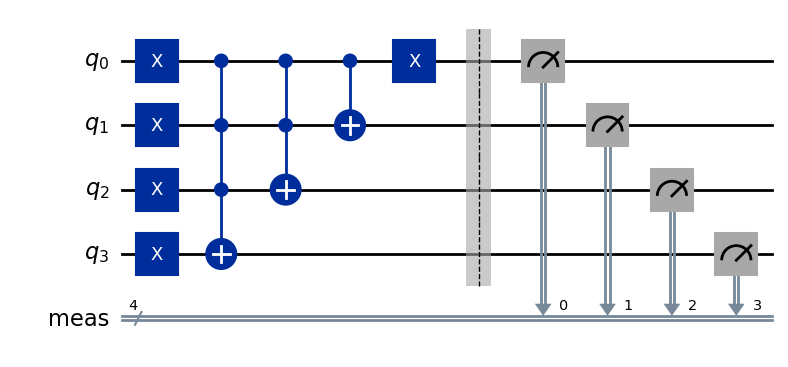

In [8]:
from qiskit.circuit.library.standard_gates import C3XGate
from qiskit import QuantumCircuit, Aer
from qiskit.visualization import plot_histogram

def increment_15():
    
    # Initialize circuit as 1111 = 15
    spi = QuantumCircuit(4)
    spi.x(0)
    spi.x(1)
    spi.x(2)
    spi.x(3)
    
    ### BEGIN SOLUTION ### 
    # Implement incrementor
    spi.append(C3XGate(), [0,1,2,3])
    spi.ccx(0,1,2)
    spi.cx(0, 1)
    spi.x(0)
    return spi
    ### END SOLUTION ###

spi = increment_15()
# Measure
spi.measure_all()
result = simulator.run(spi, shots=1).result()
print(result.get_counts())
spi.draw(output="mpl", style="iqp")


#### Explanation
The behavior is known as "overflow" (see [Integer Overflow](https://en.wikipedia.org/wiki/Integer_overflow)) and at least messes up your calculations ("bug"). In worst-case (and if not accounted for), it can lead to severe security issues.

> Between 1985 and 1987, arithmetic overflow in the Therac-25 radiation therapy machines, along with a lack of hardware safety controls, caused the death of at least six people from radiation overdoses.


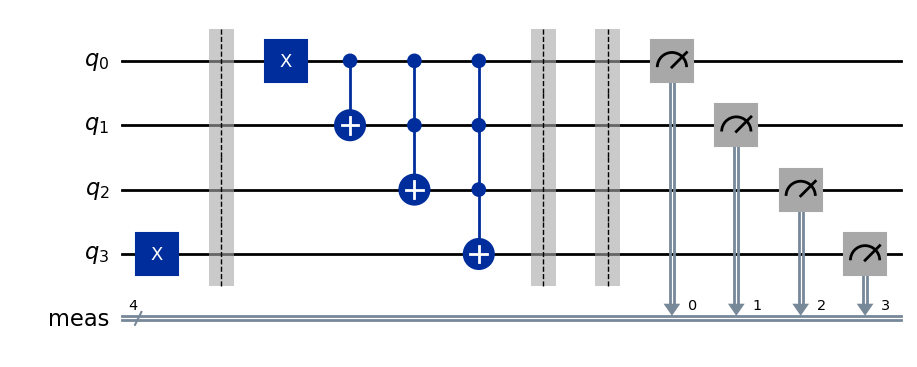

In [9]:
def decrement_by_one(circuit):
    ### BEGIN SOLUTION ### 
    circuit.barrier()
    
    circuit.x(0)
    circuit.cx(0, 1)
    circuit.ccx(0,1,2)
    circuit.append(C3XGate(), [0,1,2,3])
    
    circuit.barrier()
    ### END SOLUTION ###
    return circuit

dec = QuantumCircuit(4)
# initialize as 1000 = 8
dec.x(3)
dec = decrement_by_one(dec)
dec.measure_all()
dec.draw(output="mpl", style="iqp")

In [10]:
simulator = Aer.get_backend('aer_simulator')
result = simulator.run(dec, shots=1).result()
result.get_counts()

{'0111': 1}

## Operations in Superposition
So far we calculated only classically, but quantum circuits must also work in superposition.

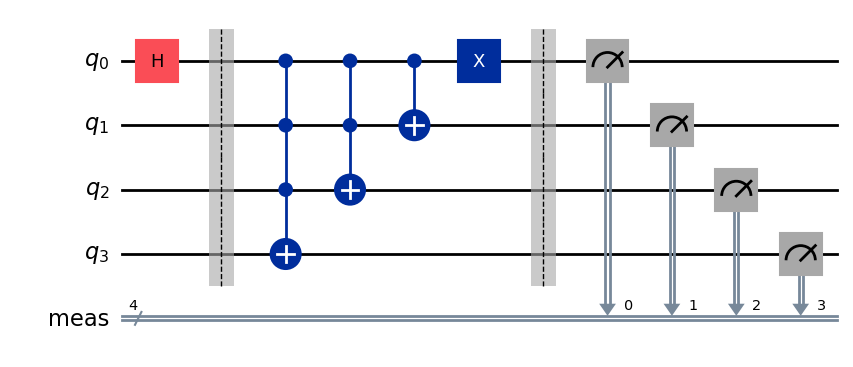

In [11]:
from qiskit.circuit.library.standard_gates import C3XGate
from qiskit import QuantumCircuit, Aer
from qiskit.visualization import plot_histogram

# Initialize circuit as 0000 = 0
spi = QuantumCircuit(4)

spi.h(0)
spi.barrier()
# Implement incrementor
spi.append(C3XGate(), [0,1,2,3])
spi.ccx(0,1,2)
spi.cx(0, 1)
spi.x(0)

# Measure
spi.measure_all()
spi.draw(output="mpl", style="iqp")

<div class="alert alert-block alert-info">
<h3>Question</h3>
    <p>What will be the outcome of this circuit?</p>
</div>

Defining some helper functions to convert the binary output to the integer representation for easier analysis:

In [12]:
def convert_to_int(bitstring):
    return sum([int(x)<<i for i,x in enumerate(reversed(bitstring))])
    
def convert_nibble_counts_to_int(counts):
    return {convert_to_int(key): value for key, value in counts.items()}

Run the circuit 5000 times to get proper statistics:

In [13]:
simulator = Aer.get_backend('aer_simulator')
result = simulator.run(spi, shots=5000).result()
plot_histogram(convert_nibble_counts_to_int(result.get_counts()))

### Operations with entanglement
The following circuit entangles $q_0$ and $q_1$.

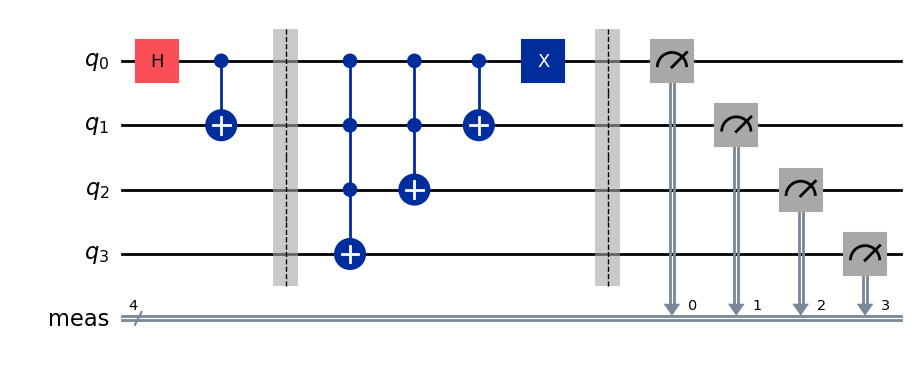

In [14]:
from qiskit.circuit.library.standard_gates import C3XGate
from qiskit import QuantumCircuit, Aer
from qiskit.visualization import plot_histogram

# Initialize circuit as 0000 = 0
spi = QuantumCircuit(4)

spi.h(0)
spi.cx(0,1)

spi.barrier()
# Implement incrementor
spi.append(C3XGate(), [0,1,2,3])
spi.ccx(0,1,2)
spi.cx(0, 1)
spi.x(0)

# Measure
spi.measure_all()
spi.draw(output="mpl", style="iqp")

50% state 1:
0  0 
0  0
0  0
0  0
       = 0

50% state 2:
0  1   = 1
0  1   = 2
0  0
0  0
       = 3

add +1 to each: result is 1 and 4
          

<div class="alert alert-block alert-info">
<h3>Question</h3>
    <p>What will be the outcome of this circuit?</p>
</div>

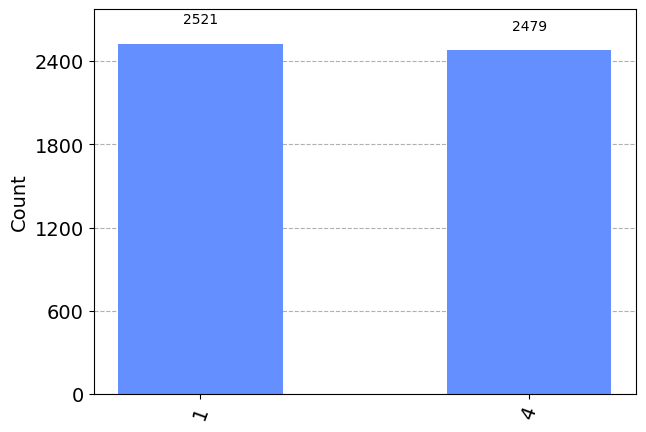

In [15]:
simulator = Aer.get_backend('aer_simulator')
result = simulator.run(spi, shots=5000).result()
plot_histogram(convert_nibble_counts_to_int(result.get_counts()))

## Quantum Addition
We can see that calculating

$$c = a+b$$

violates the reversibility constraint of quantum programming (the value in register c is overwritten and can not be recovered after the addition).

In addition, it would also violate the no-copy-constraint because we could calculate 
$$b_2 = c-a$$
and end up with two copies of $b$

&rightarrow; How can we implement addition in quantum computing?

### The add-and-assign operator +=
Many conventional languages also implement this operator to add a value and assign the result directly to the variable.

In [16]:
a = 5
b = 3
a += b   # == a = a + b
print(a)

8


This operation is reversible, because we can do

In [17]:
a -= b
print(a)

5


### Quantum add-and-assign
The following circuit implements $a += b$ using two 4-bit qubit registers.

$a = b0010 = 2$

$b = b0110 = 6$

We expect $a = b1000 = 8$ after the add-and-assign operation.

In [18]:
from qiskit import QuantumRegister
from qiskit.circuit.library.standard_gates import C4XGate, C3XGate

# prepare two numbers using a new feature "QuantumRegister"
a = QuantumRegister(4, name="a")
b = QuantumRegister(4, name="b")

adder = QuantumCircuit(a, b)

# set a to 0010 = 2
adder.x(a[1])
# set b to 0110 = 6
adder.x(b[1])
adder.x(b[2])

# implement the addition
adder.barrier()
adder.append(C4XGate(), [0, 1, 2, 4, 3])
adder.append(C3XGate(), [0, 1, 4, 2])
adder.ccx(0, 4, 1)
adder.cx(4, 0)

adder.barrier()
adder.append(C3XGate(), [1, 2, 5, 3])
adder.ccx(1, 5, 2)
adder.cx(5, 1)

adder.barrier()
adder.ccx(2,6,3)
adder.cx(6,2)

adder.barrier()
adder.cx(7,3)

adder.measure_all()
adder.draw(output="mpl", style="iqp")

In [19]:
simulator = Aer.get_backend('aer_simulator')
result = simulator.run(adder, shots=1024).result()
res = result.get_counts()
bitstring = list(res.keys())[0]
b = bitstring[0:4]
a = bitstring[4:]
print(f"The measurement result for all bits is {bitstring}.")
print(f"a is {a} or {convert_to_int(a)}")
print(f"b is {b} or {convert_to_int(b)}")

The measurement result for all bits is 01101000.
a is 1000 or 8
b is 0110 or 6


## Is this useful?
Yes! Increment / Decrement / Additions are used as part of complex algorithms such as Shor's and others. It will not always be exactly the same (simple) implementation, but it will implement some mathematical operations on registers of qubit.

See the following simple (and non-optimized / non-production-ready) modulo implementation part of Shor's algorithm (full example: [Ex 12-1 Shor's Factoring Algorithm](https://oreilly-qc.github.io))

<img src="images/modulo_circuit.png" width="50%">

## Addition in superposition

The Add-And-Assign operation also works on complex state in superposition. 

### Feature: Composite Gates
In Qiskit, any circuit can be converted to a composite gate using the [QuantumCircuit.to_gate()](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.QuantumCircuit#to_gate) method. This is a useful feature to simplify circuits and create re-usable (higher-level) primitives.

In [20]:
def create_custom_adder_gate():
    """Create a custom gate implementing addition of two 4-qubit registers."""
    adder = QuantumCircuit(8, name="a+=b")

    # bit 0
    adder.append(C4XGate(), [0, 1, 2, 4, 3])
    adder.append(C3XGate(), [0, 1, 4, 2])
    adder.ccx(0, 4, 1)
    adder.cx(4, 0)

    # bit 1
    adder.append(C3XGate(), [1, 2, 5, 3])
    adder.ccx(1, 5, 2)
    adder.cx(5, 1)

    # bit 2
    adder.ccx(2,6,3)
    adder.cx(6,2)

    # bit 3
    adder.cx(7,3)
    
    add_gate = adder.to_gate()
    return add_gate

add_gate = create_custom_adder_gate()

We can now use the new custom gate in a much simpler circuit to check out the addition in superposition:

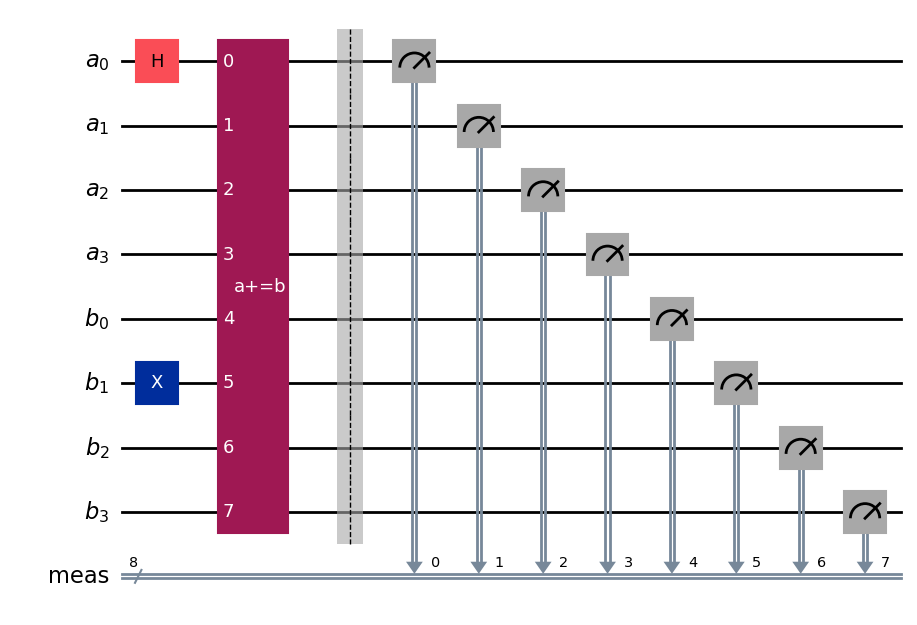

In [21]:
a = QuantumRegister(4, name="a")
b = QuantumRegister(4, name="b")

## Initialization
add_super = QuantumCircuit(a, b)
# set a to either 0000 or 0001
add_super.h(a[0])
# set b to 0010
add_super.x(b[1])

## Add our custom gate
add_super.append(add_gate, [0, 1,2,3,4,5,6,7])

# Measure
add_super.measure_all()

add_super.draw(output="mpl", style="iqp")

<div class="alert alert-block alert-info">
<h3>Question</h3>
    <p>What will be the outcome of this circuit?</p>
    
</div>

In [22]:
### BEGIN SOLUTION
from qiskit import transpile

simulator = Aer.get_backend('aer_simulator')

# We need to manually transpile the circuit due to our custom "Adder" gate
add_super = transpile(add_super, simulator)

result = simulator.run(add_super, shots=1024).result()
res = result.get_counts()
### END SOLUTION

for bitstring, counts in res.items():
    b = bitstring[0:4]
    a = bitstring[4:]
    print(f"Measured {bitstring} {counts} times.")
    print(f"a is {a} or {convert_to_int(a)}")
    #print(f"b is {b} or {convert_to_int(b)}")

Measured 00100011 522 times.
a is 0011 or 3
Measured 00100010 502 times.
a is 0010 or 2


<div class="alert alert-block alert-info">
<h3>Exercise: Composite gates</h3>
    <p>Create a composite entanglement gate (EPR/Bell-State) to:</p>
<ol>
    <li>Entangle any two qubits in a quantum circuit of n qubits (n > 2)</li>
    <li>[Bonus] Entangle all qubits in a register</li>
    <li>[Bonus] Entangle an arbitrary number of qubits <= n qubits</li>
</ol>
<p>Use the following function templates and tests for your composite gate:</p>
</div>

In [23]:
def entangle_two():
    """
    Returns a Qiskit composite gate that will entangle two qubits.
    """
    ### BEGIN SOLUTION
    entangle = QuantumCircuit(2, name="Bell")
    entangle.h(0)
    entangle.cx(0, 1)
    return entangle.to_gate()
    ### END SOLUTION

Your circuit for the example below should look like this:

![Powerbell](images/bell.png)

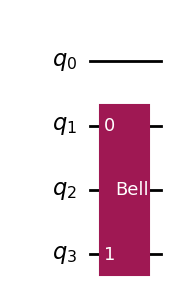

In [24]:
# Create a nice quantum circuit
qc = QuantumCircuit(4)
EntangleGate = entangle_two()

qc.append(EntangleGate, [1, 3])
qc.draw()

It is always possible to "decompose" the composite gate to see the underlying low-level operations:

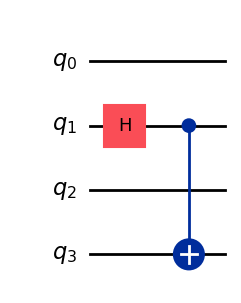

In [25]:
qc.decompose().draw()

In [26]:
def entangle_n(n_qubits: int):
    """
    Returns a Qiskit composite gate that will entangle all qubits.

    Hint: You will require a loop using the total number of qubits (n_qubits)!
    """
    ### BEGIN SOLUTION
    entangle = QuantumCircuit(n_qubits, name="Power-Bell")
    # had on 0
    entangle.h(0)
    # cx between the rest via loop
    for qubit in range(n_qubits-1):
        entangle.cx(qubit,qubit+1)

    # return as gate
    return entangle.to_gate()
    ### END SOLUTION

Your circuit for the example below should look like this:

![Powerbell](images/powerbell.png)

In [27]:
# Create a nice quantum circuit
qc = QuantumCircuit(4)
qc.append(entangle_n(n_qubits=3), [0,1,3])
qc.draw()

In [28]:
qc.decompose().draw()

The same "generalized" gate can be used to create a two-qubit-entanglement-gate:

In [29]:
# Create a nice quantum circuit
qc = QuantumCircuit(4)
qc.append(entangle_n(2), [1,3])
qc.draw()

## Conditonal Quantum Execution
Just as in classic programming we can use condtional execution in quantum programming and even in superposition.

* Conditional execution uses control qubits to define condition
* Normal building blocks (increment, decrement, add etc) are used with additional controls

Let's assume the following example: We have two variables a and b. If a is less than 0, we want to increment b, otherwise nothing is done.
* a = 1 or -7
* b = 1
* if a < 0: b++
* --> if a<0 then b==2
* --> if a>=0 then b==1

The condition can be implemented by using the *sign* qubit in Two's Complement as control qubit for controlled gate operations.
 

<div class="alert alert-block alert-warning">
<h3>Important: The following examples use signed integers with Two's Complement!</h3>
</div>

In [30]:
def convert_to_signed_int(bitstring):
    total = 0
    for i, x in enumerate(reversed(bitstring)):
        term = int(x) << i
        if i == len(bitstring)-1:
            # negative 2s complement
            total -= term
        else:
            total += term
    return total

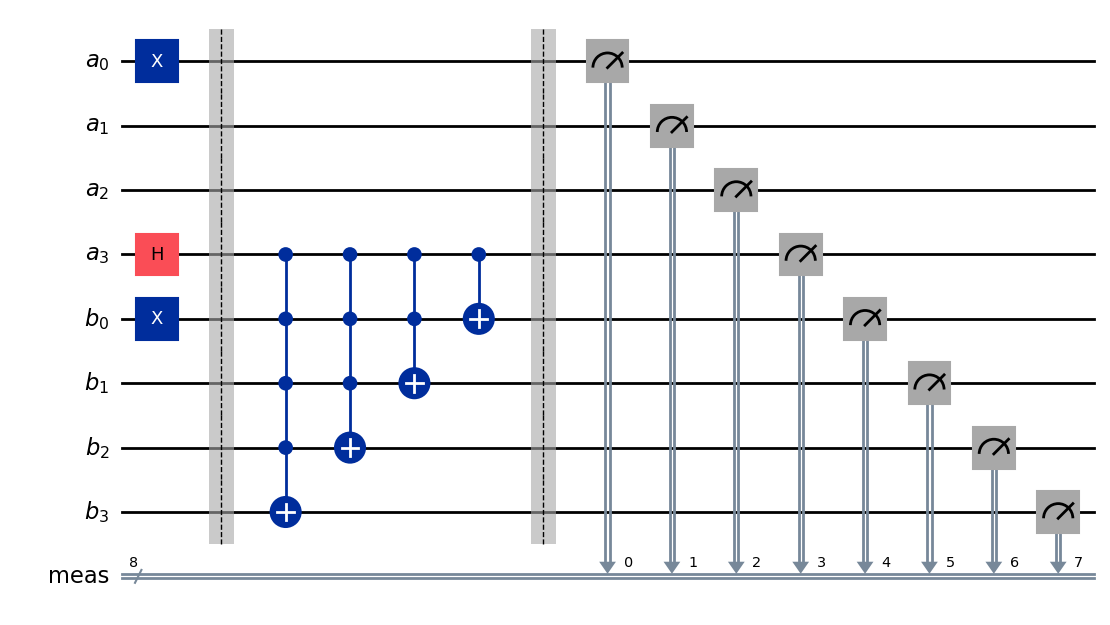

In [31]:
a = QuantumRegister(4, name="a")
b = QuantumRegister(4, name="b")
qc = QuantumCircuit(a,b)

# Set a 1 or -7 via superposition
qc.x(a[0])
qc.h(a[3])

# Set b 1
qc.x(b[0])
# qc.h(b[1]) # uncomment to set b in superposition of 1 or 3
# qc.x(b[3])  # uncomment to make b negative as well

# conditional increment
qc.barrier()
qc.append(C4XGate(), [a[3], b[0], b[1], b[2], b[3]])
qc.append(C3XGate(), [a[3], b[0], b[1], b[2]])
qc.ccx(a[3], b[0], b[1])
qc.cx(a[3], b[0])

qc.measure_all()

qc.draw(output="mpl", style="iqp")

<div class="alert alert-block alert-info">
<h3>Reminder Two's Complement</h3>
    <p>Check that you understand why the quantum register <b>a</b> takes either the value -7 or 1</p>
    
</div>

In [32]:
result = simulator.run(qc, shots=1024).result()
res = result.get_counts()

for bitstring, counts in res.items():
    b = bitstring[0:4]
    a = bitstring[4:]
    print(f"Measured {bitstring} {counts} times.")
    print(f"a is {a} or {convert_to_signed_int(a)}")
    print(f"b is {b} or {convert_to_signed_int(b)}")

Measured 00010001 531 times.
a is 0001 or 1
b is 0001 or 1
Measured 00101001 493 times.
a is 1001 or -7
b is 0010 or 2


## Reversibility and Ancilla Qubits
* Not all operations have alternative formulation such as the addition
* Use of (additional) ancilla qubits can ensure reversibility
* Ancilla qubits are used heavily throughout quantum algorithms
  
### Example: abs(x)
Getting the absolute value of an integer is not reversible.

<div class="alert alert-block alert-info">
<h3>Question</h3>
    <p>What information is lost when taking abs? What would we need to recover?</p>
    
</div>

We want to implement a gate that can return the absolute value:

In [33]:
a = -5
print(abs(a))

5


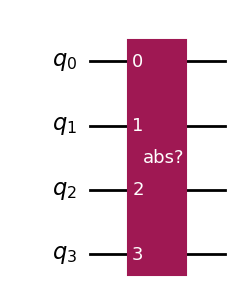

In [34]:
abs_c = QuantumCircuit(4, name="abs?")
abs_gate = abs_c.to_gate()

qc = QuantumCircuit(4)
qc.append(abs_gate, [0,1,2,3])
qc.draw(output="mpl", style="iqp")

But a reversible version is possible using a ancilla qubit to store the sign!

The basic algorithm for negation of a two-complements integer is (you can look it up, prove it or believe it):

```
If value is < 0
    Negate each bit
    Add 1
```

For example, for -4 (1100):
1. Negation: 0011 = 3
2. Add 1: 0100 = 4

Or -7 (1001):
1. Negation: 0110 = 6
2. Add 1: 0111 = 7

### Implementation in Qiskit

<div class="alert alert-block alert-info">
<h3>Exercise 3</h3>
    <ul>
    <li>Implement the abs() operation outlined above. Use the template function below for some guidance.</li>
    <li>Use a superposition of 1 or -7 as input value for a</li>
    </ul>
    <p>Bonus Question: What operation is implemented if no ancilla qubit is used?</p>
</div>

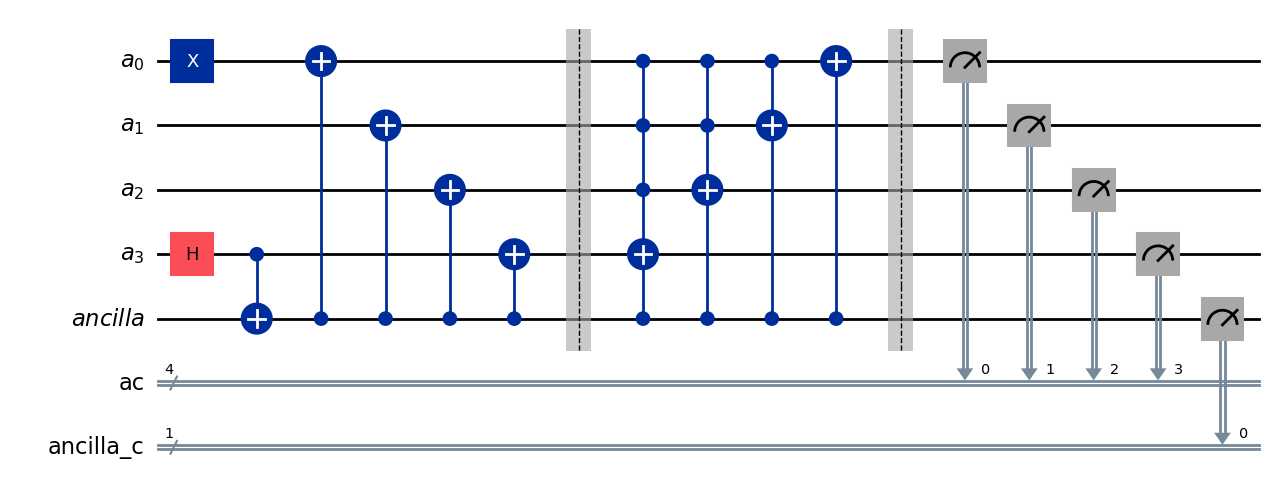

In [35]:
from qiskit import ClassicalRegister
from qiskit.circuit.library import MCXGate

# Define quantum and classical register for integer a
a = QuantumRegister(4, name="a")
ac = ClassicalRegister(4, name="ac")

# Define quantum and classical register for ancilla
ancilla = QuantumRegister(1, name="ancilla")
ancilla_c = ClassicalRegister(1, name="ancilla_c")

# Create circuit
qc = QuantumCircuit(a,ancilla, ac, ancilla_c)

# define a as 1 or -7
### BEGIN SOLUTION ###
qc.x(a[0])
qc.h(a[3])
### END SOLUTION

# store sign on ancilla qubit!
### BEGIN SOLUTION ###
qc.cx(a[3], ancilla[0])
### END SOLUTION

# Negate all bits
### BEGIN SOLUTION ###
qc.cx(ancilla[0], a)

# Alternative with explicit notation:
# qc.cx(ancilla[0], a[0])
# qc.cx(ancilla[0], a[1])
# qc.cx(ancilla[0], a[2])
# qc.cx(ancilla[0], a[3])

### END SOLUTION

# Add 1
### BEGIN SOLUTION ###
qc.barrier()
qc.append(C4XGate(), [ancilla[0], a[0], a[1], a[2], a[3]])
qc.append(C3XGate(), [ancilla[0], a[0], a[1], a[2]])
qc.ccx(ancilla[0], a[0], a[1])
qc.cx(ancilla[0], a[0])
qc.barrier()
### END SOLUTION


qc.measure(a, ac)
qc.measure(ancilla, ancilla_c)
qc.draw(output="mpl", style="iqp")

In [36]:
result = simulator.run(qc, shots=1024).result()
res = result.get_counts()
print(res)
for bitstring, counts in result.get_counts().items():
    ancilla, a = bitstring.split()
    num = convert_to_signed_int(a)
    ancilla2 = "+" if int(ancilla) == 0 else "-"
    print(f"Ancilla bit is {ancilla} ({ancilla2}), original value was {ancilla2}{num}, absolute value calculated is {num}.")
    

{'1 0111': 521, '0 0001': 503}
Ancilla bit is 1 (-), original value was -7, absolute value calculated is 7.
Ancilla bit is 0 (+), original value was +1, absolute value calculated is 1.



<div class="alert alert-block alert-success">
<h4>While we only worked with integers, similar ways to encode classical decimal numbers are available: Fixed point representation or floating point representation. 
</h4>
    <p>We do not look into these, if you get the basic ideas from above you can also understand how the other encodings work.</p>
</div>

## Problems with Ancilla Qubits
* Ancilla qubits get entangled with our circuit (see example above!)
* READ on ancilla qubit can collapse our precious quantum state
* Re-use of ancilla qubits within the circuit not possible (as desirable in larger circuits!)

### Solution: Uncompute
* Uncompute means reversing all of the operations that entangled our qubit
* Result is ancilla qubit in state 0 :-) 
* BUT: Also operation done with ancilla qubit (e.g., *abs*), undone! :-(

&rightarrow; Intermediate result (such as abs(x)) can be used in other calculations before the uncompute!

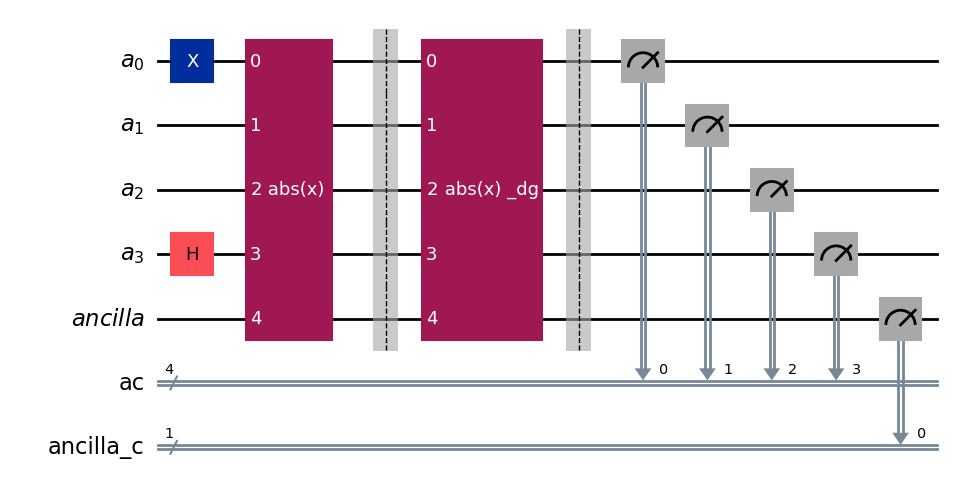

In [37]:
from qiskit import ClassicalRegister
from qiskit.circuit.library import MCXGate

def abs_gate():
    qc = QuantumCircuit(5, name=" abs(x) ")
    # Implementation of abs gate
    ### BEGIN SOLUTION
    qc.cx(3, 4)
    qc.cx(4, [0,1,2,3])
    
    qc.append(C4XGate(), [4, 0, 1, 2, 3])
    qc.append(C3XGate(), [4, 0, 1, 2])
    qc.ccx(4, 0, 1)
    qc.cx(4, 0)
    ### END SOLUTION
    abs_gate = qc.to_gate()
    return abs_gate

# Define quantum and classical register for integer a
a = QuantumRegister(4, name="a")
ac = ClassicalRegister(4, name="ac")

# Define quantum and classical register for ancilla
ancilla = QuantumRegister(1, name="ancilla")
ancilla_c = ClassicalRegister(1, name="ancilla_c")

qc = QuantumCircuit(a, ancilla, ac, ancilla_c)

# define a as 1 or -7
qc.x(a[0])
qc.h(a[3])

# append the abs gate
qc.append(abs_gate(), [*a, *ancilla])
qc.barrier()
# append the reverse of the abs gate using the nice function .inverse()
qc.append(abs_gate().inverse(), [*a, *ancilla])
qc.barrier() 

qc.measure(a, ac)
qc.measure(ancilla, ancilla_c)
qc.draw(output="mpl", style="iqp")

In [38]:
from qiskit import transpile

simulator = Aer.get_backend('aer_simulator')

# We need to manually transpile the circuit due to our custom "Adder" gate
qc_transpiled = transpile(qc, simulator)

result = simulator.run(qc_transpiled, shots=1024).result()

res = result.get_counts()
print(res)
for bitstring, counts in result.get_counts().items():
    ancilla, a = bitstring.split()
    num = convert_to_signed_int(a)
    ancilla2 = "+" if int(ancilla) == 0 else "-"
    print(f"Ancilla bit is {ancilla} ({ancilla2}), value is {num}.")

{'0 0001': 512, '0 1001': 512}
Ancilla bit is 0 (+), value is 1.
Ancilla bit is 0 (+), value is -7.


The circuit without the composite gates can also be visualized after transpilation:

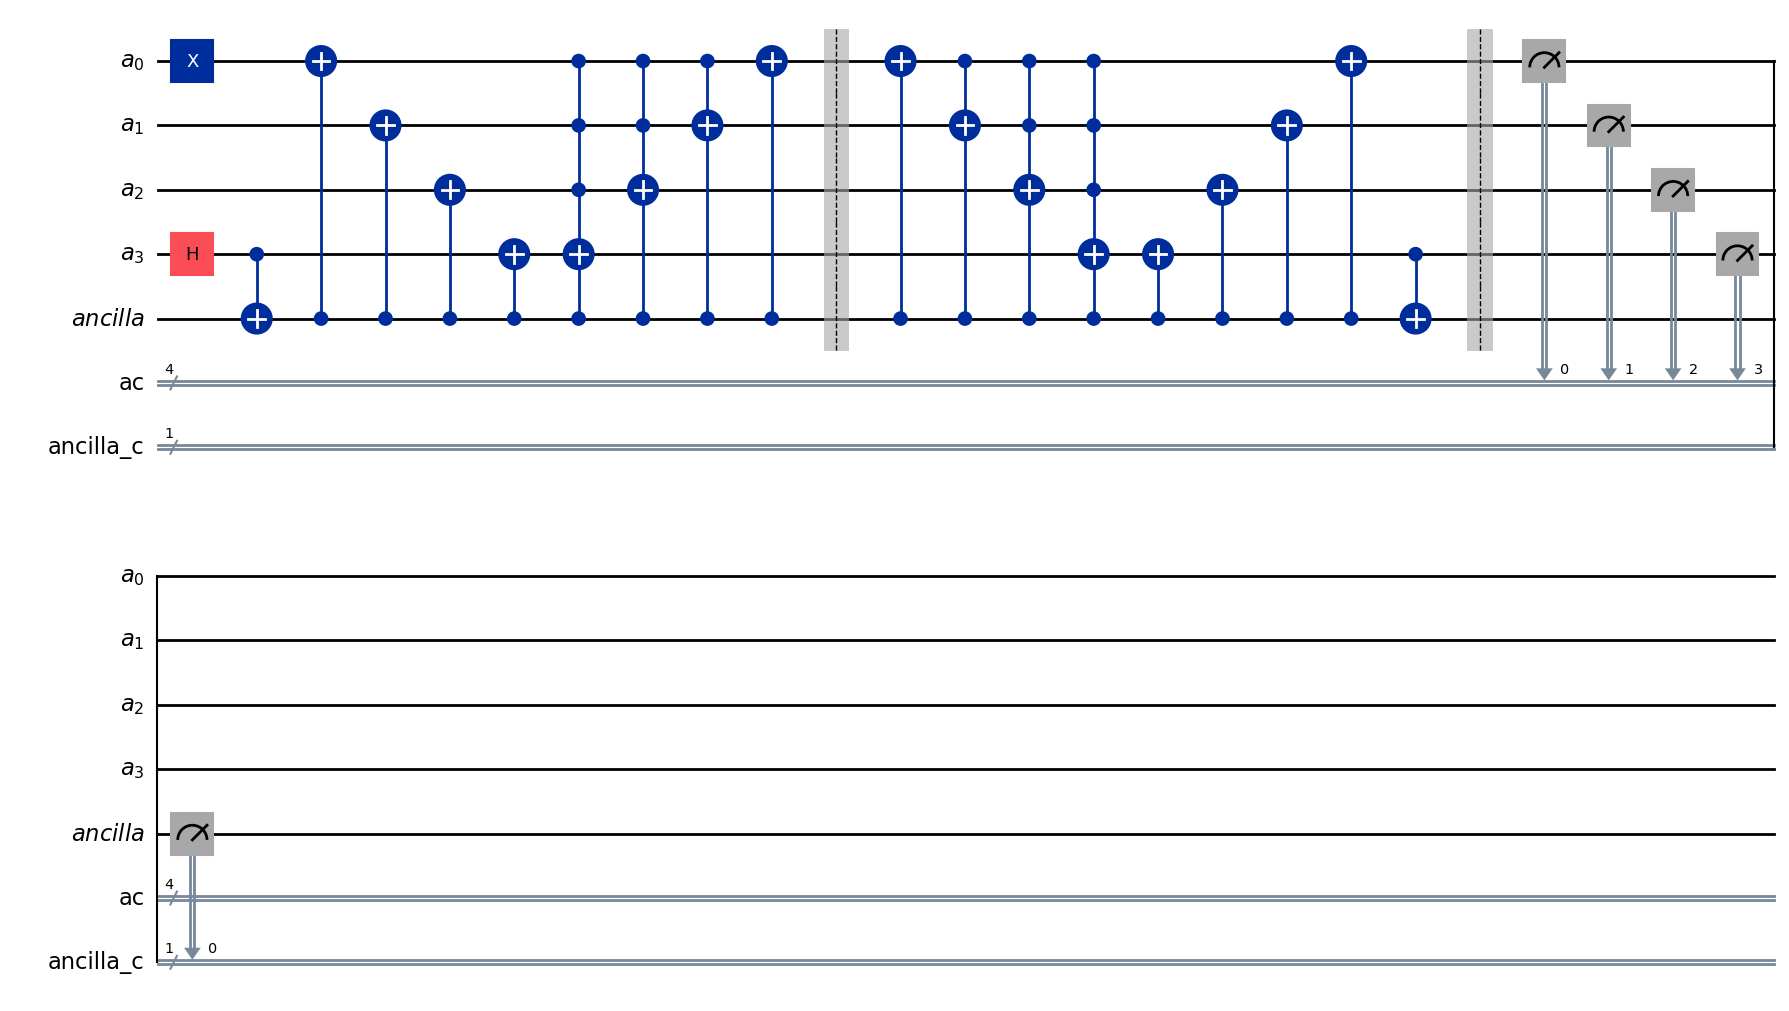

In [39]:
qc_transpiled.draw(output="mpl", style="iqp")

## Using Results Between Compute and Uncompute
There are at least two ways to use the results:

1. Computing another value based on it before uncompute
2. Storing the result in the (inaccessible) relative phase of the qubits

### Example: Calculate a = a + abs(b) (Case 1)
In the following example we add the absolute value of register b to our register a using our adder and un-compute the abs operation on register b to re-use the qubits later.

```
a = a + abs(b) 

a = 1
b = 5 or -3 
```

Expected result: 6 or 4

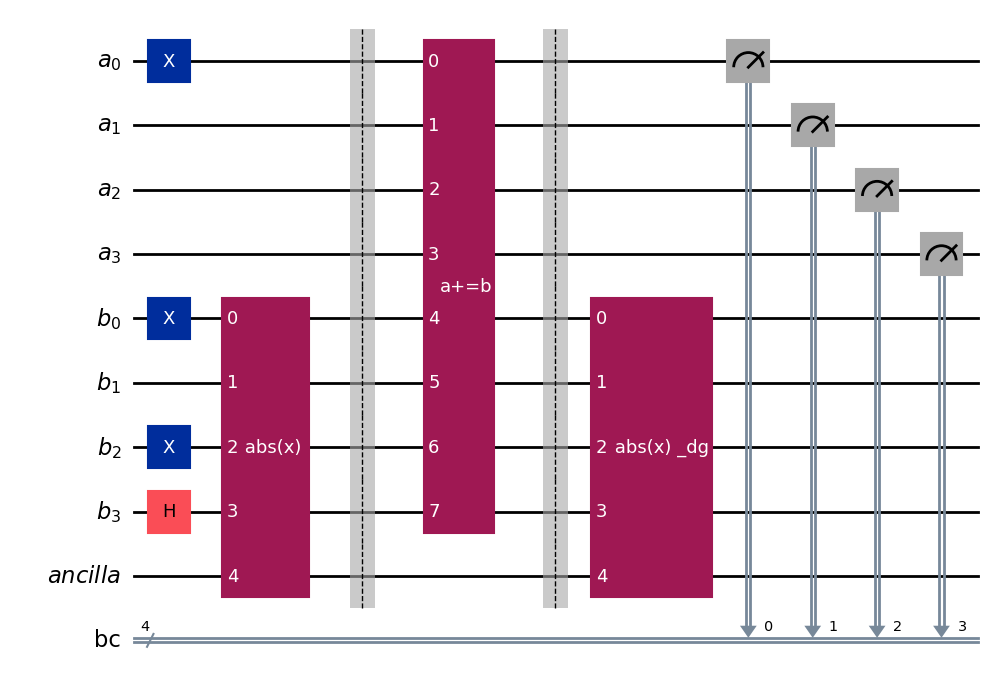

In [40]:
import numpy as np

# Define quantum and classical register for integer a
a = QuantumRegister(4, name="a")
b = QuantumRegister(4, name="b")

bc = ClassicalRegister(4, name="bc")

# Define quantum and classical register for ancilla
ancilla = QuantumRegister(1, name="ancilla")

qc = QuantumCircuit(a, b, ancilla, bc)

# Set b to 0101 (5) or 1101 (-3)
qc.x(b[0])
qc.x(b[2])
qc.h(b[3])
# Set a to 1
qc.x(a[0])

qc.append(abs_gate(), [*b, *ancilla])
qc.barrier()
qc.append(add_gate, [*a, *b])
qc.barrier()
qc.append(abs_gate().inverse(), [*b, *ancilla])

# expectation:
#    if b == 5: a + abs(b) = 6 
#    if b == -3: a + abs(b) = 4
qc.measure(a, bc)
qc.draw(output="mpl", style="iqp")

In [41]:
from qiskit import transpile

simulator = Aer.get_backend('aer_simulator')

# We need to manually transpile the circuit due to our custom "Adder" gate
qc = transpile(qc, simulator)

result = simulator.run(qc, shots=1024).result()

res = result.get_counts()
print(res)
for bitstring, counts in res.items():
    print(f"Measured {bitstring} {counts} times.")
    print(f"a is {bitstring} or {convert_to_signed_int(bitstring)}")
    
    

{'0100': 528, '0110': 496}
Measured 0100 528 times.
a is 0100 or 4
Measured 0110 496 times.
a is 0110 or 6


### Example: Flip phase if abs(a) == 1(Case 2)

Instead of using the result in another computation we can also store the result in the relative phase of our qubit register.

The relative phases will "survive" the un-computation as can be shown mathematically, but also "hands-on" using Qiskit:

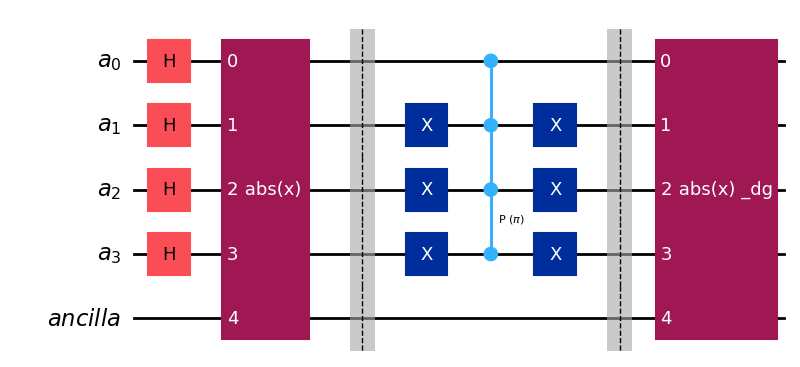

In [42]:
import numpy as np
from qiskit.quantum_info import Statevector
from qiskit.visualization import array_to_latex, plot_state_city

# Define quantum and classical register for integer a
a = QuantumRegister(4, name="a")

# Define quantum and classical register for ancilla
ancilla = QuantumRegister(1, name="ancilla")

qc = QuantumCircuit(a, ancilla)

# Apply hadamard on all qubits to create equal superposition (==all random)
qc.h(a)

stv0 = Statevector.from_instruction(qc)

qc.append(abs_gate(), [*a, *ancilla])

stv1 = Statevector.from_instruction(qc)
qc.barrier()

qc.x(a[1:])
qc.mcp(np.pi, a[0:3], a[3])
qc.x(a[1:])

stv2 = Statevector.from_instruction(qc)
qc.barrier()
qc.append(abs_gate().inverse(), [*a, *ancilla])

stv3 = Statevector.from_instruction(qc)

qc.draw(output="mpl", style="iqp")

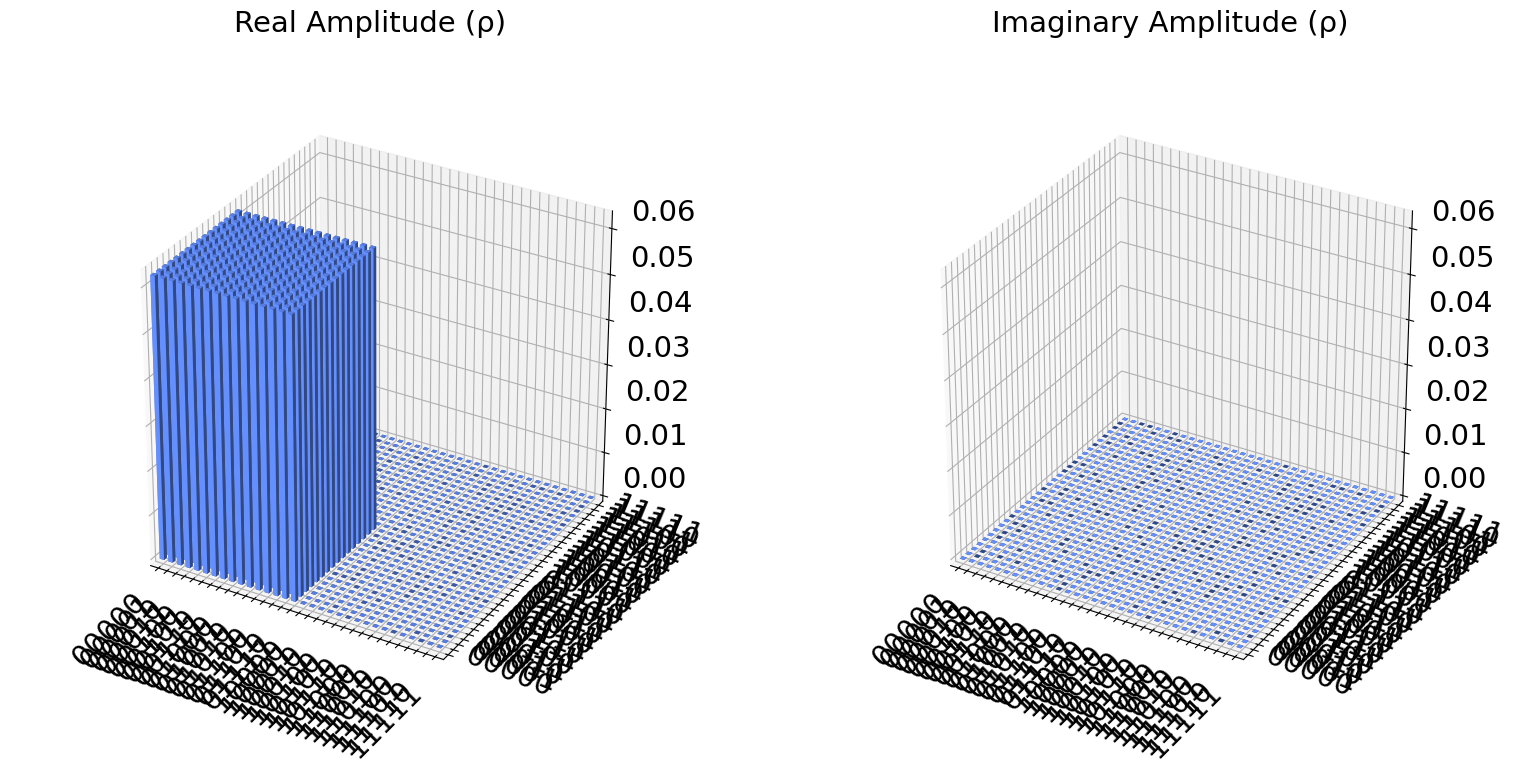

In [43]:
plot_state_city(stv0)

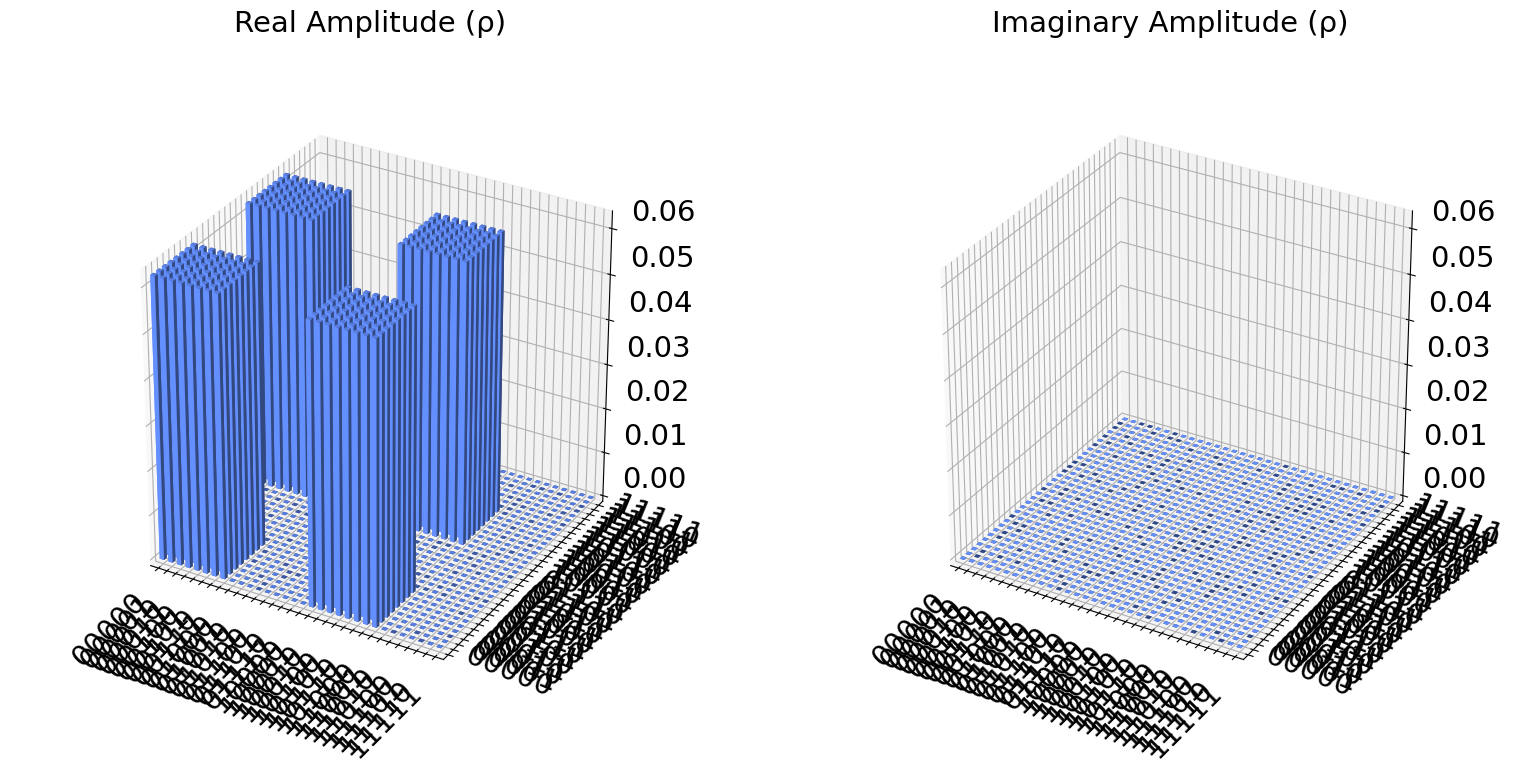

In [44]:
plot_state_city(stv1)

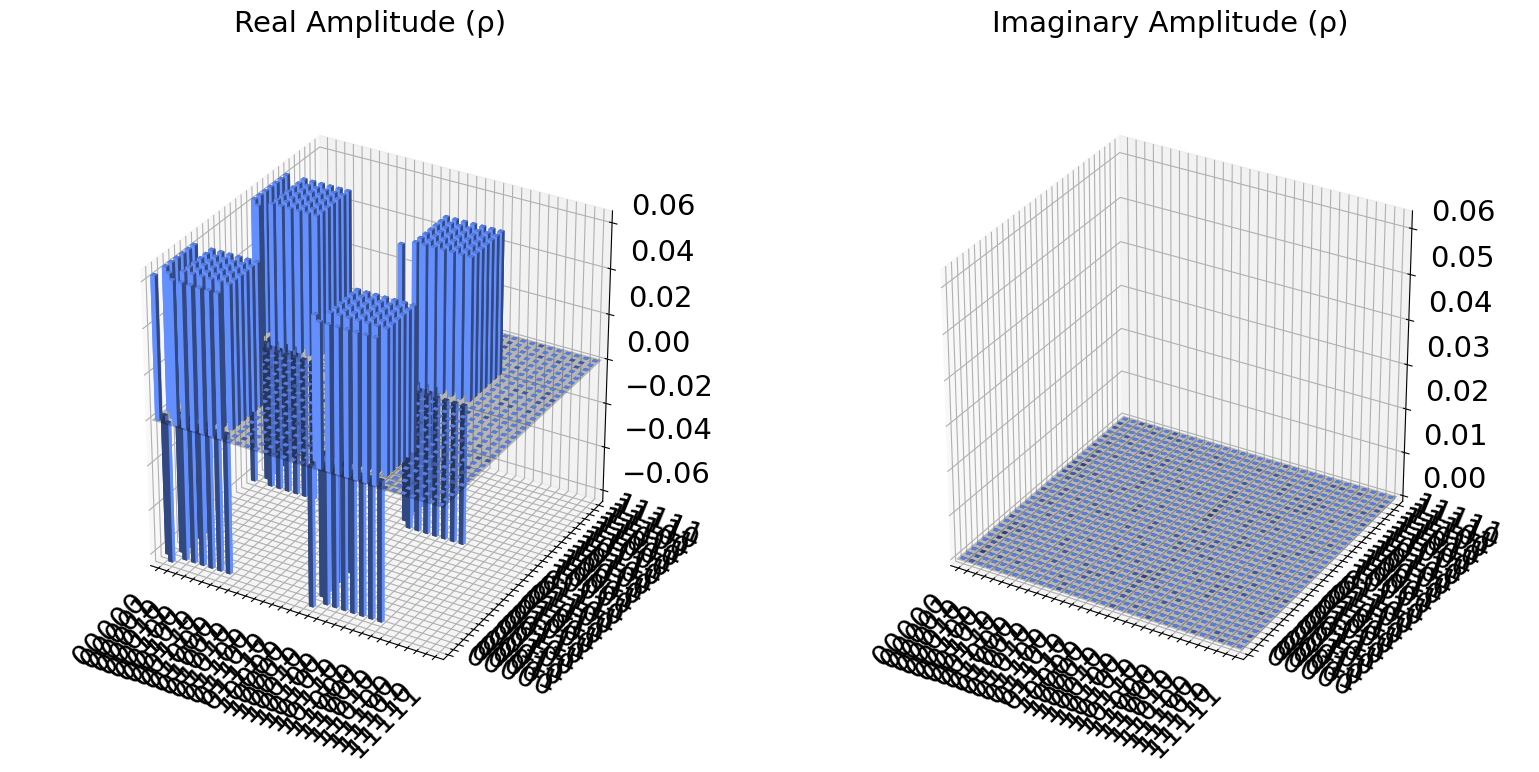

In [45]:
plot_state_city(stv2)

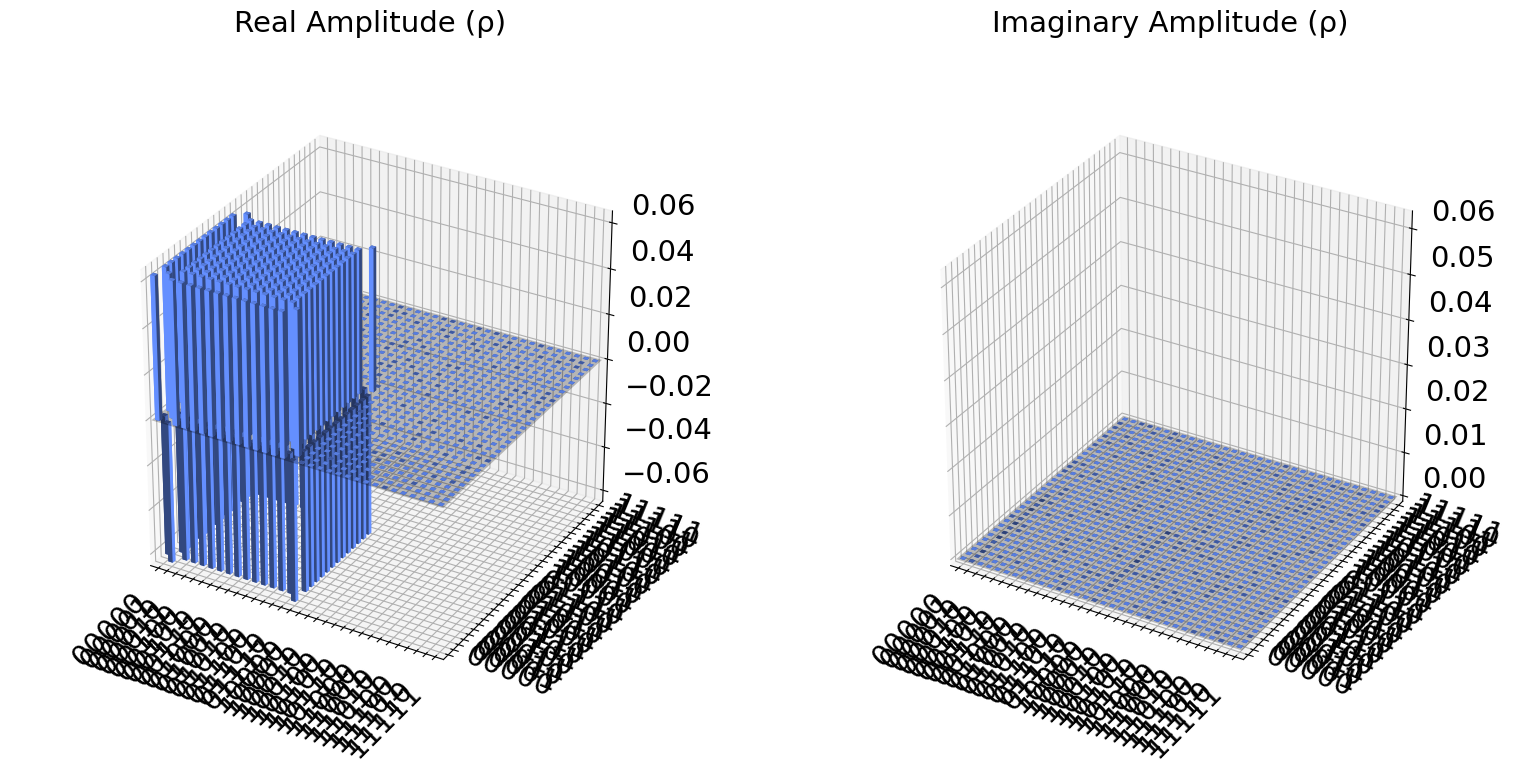

In [46]:
plot_state_city(stv3)

In [47]:
stv3

Statevector([ 0.25+0.00000000e+00j, -0.25+8.32667268e-17j,
              0.25+0.00000000e+00j,  0.25+0.00000000e+00j,
              0.25+0.00000000e+00j,  0.25+0.00000000e+00j,
              0.25+0.00000000e+00j,  0.25+0.00000000e+00j,
              0.25+0.00000000e+00j,  0.25+0.00000000e+00j,
              0.25+0.00000000e+00j,  0.25+0.00000000e+00j,
              0.25+0.00000000e+00j,  0.25+0.00000000e+00j,
              0.25+0.00000000e+00j, -0.25+8.32667268e-17j,
              0.  +0.00000000e+00j,  0.  +0.00000000e+00j,
              0.  +0.00000000e+00j,  0.  +0.00000000e+00j,
              0.  +0.00000000e+00j,  0.  +0.00000000e+00j,
              0.  +0.00000000e+00j,  0.  +0.00000000e+00j,
              0.  +0.00000000e+00j,  0.  +0.00000000e+00j,
              0.  +0.00000000e+00j,  0.  +0.00000000e+00j,
              0.  +0.00000000e+00j,  0.  +0.00000000e+00j,
              0.  +0.00000000e+00j,  0.  +0.00000000e+00j],
            dims=(2, 2, 2, 2, 2))



<div class="alert alert-block alert-success">
<p>Measuring the final state (stv3) shown above will yield exactly the same result as our initial circuit (stv0). Yet, we have the information <code>abs(a) == 1</code> encoded in the relative phases of our qubit register.</p>
    <p>When running the circuit we can see equal probability for each state and that the ancilla qubit is always back in the initial state 0:</p>
</div>

In [48]:
from qiskit import transpile

qc_orig = qc.copy()
simulator = Aer.get_backend('aer_simulator')
qc.measure_all()
# We need to manually transpile the circuit due to our custom "Adder" gate
qc = transpile(qc, simulator)

result = simulator.run(qc, shots=1024).result()

res = result.get_counts()
print(res)
print("\nMeasured the following individual results:\n")
for bitstring, counts in res.items():
    #print(f"Measured {bitstring} {counts} times.")
    print(f"a {convert_to_signed_int(bitstring[1:])}")
    print(f"Scratch qubit is: {bitstring[0]}")
    print("...................")

{'00001': 56, '01100': 65, '01101': 59, '00111': 73, '00011': 75, '01011': 66, '01010': 63, '00010': 69, '00000': 68, '01111': 73, '00100': 50, '01110': 53, '01001': 72, '00101': 66, '01000': 59, '00110': 57}

Measured the following individual results:

a 1
Scratch qubit is: 0
...................
a -4
Scratch qubit is: 0
...................
a -3
Scratch qubit is: 0
...................
a 7
Scratch qubit is: 0
...................
a 3
Scratch qubit is: 0
...................
a -5
Scratch qubit is: 0
...................
a -6
Scratch qubit is: 0
...................
a 2
Scratch qubit is: 0
...................
a 0
Scratch qubit is: 0
...................
a -1
Scratch qubit is: 0
...................
a 4
Scratch qubit is: 0
...................
a -2
Scratch qubit is: 0
...................
a -7
Scratch qubit is: 0
...................
a 5
Scratch qubit is: 0
...................
a -8
Scratch qubit is: 0
...................
a 6
Scratch qubit is: 0
...................


<div class="alert alert-block alert-warning">
<h4>This seems pretty useless since we can not access the information stored in the relative phase, but we'll see later that quantum algorithms can and that primitives exist to convert relative phases to measureable amplitudes!</h4>
</div>

### Appetizer
Making the relative phase measurable...

In [49]:
def grover_mirror(n_qubits):
    """
    Implements a Grover Mirror or Amplitude Amplification step on n_qubits.
    """
    a = QuantumRegister(n_qubits)
    qc = QuantumCircuit(a, name="Grover Mirror")
    # grover mirror / amplitude amplification
    qc.h(a)
    qc.x(a)
    qc.mcp(np.pi, a[0:-1], a[-1])
    qc.x(a)
    qc.h(a)
    return qc.to_gate()

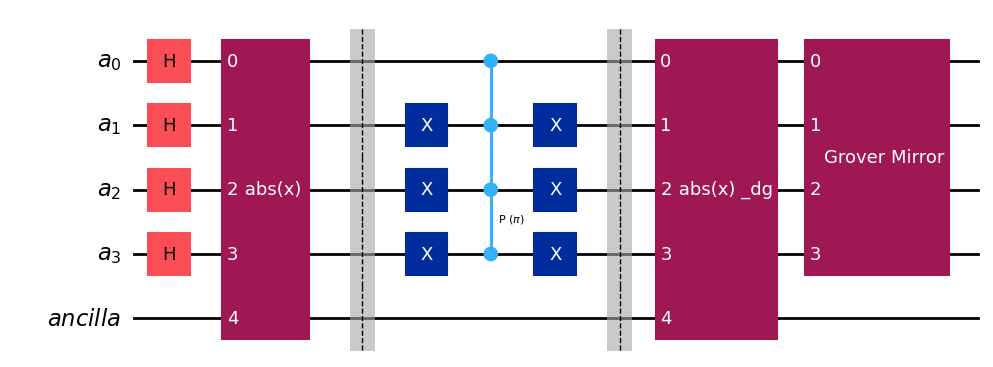

In [50]:
qc_orig.append(grover_mirror(4), [0,1,2,3])
stv = Statevector(qc_orig)
qc_orig.draw()

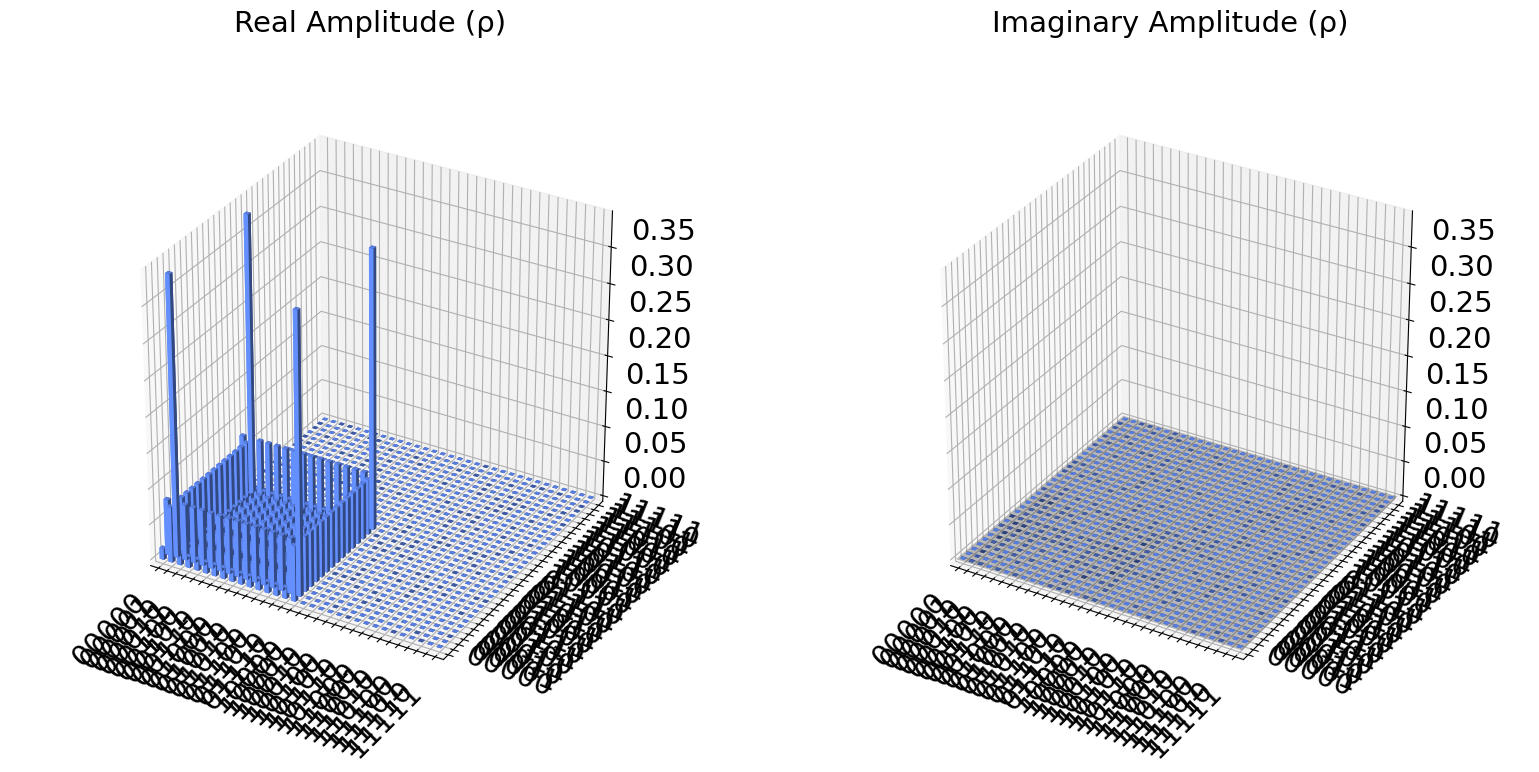

In [51]:
plot_state_city(stv)

In [52]:
# Show state vector (only real part)
[(i, round(n.real, 2)) for i, n in enumerate(stv)]

[(0, -0.12),
 (1, -0.62),
 (2, -0.12),
 (3, -0.12),
 (4, -0.12),
 (5, -0.12),
 (6, -0.12),
 (7, -0.12),
 (8, -0.12),
 (9, -0.12),
 (10, -0.12),
 (11, -0.12),
 (12, -0.12),
 (13, -0.12),
 (14, -0.12),
 (15, -0.62),
 (16, 0.0),
 (17, 0.0),
 (18, 0.0),
 (19, 0.0),
 (20, 0.0),
 (21, 0.0),
 (22, 0.0),
 (23, 0.0),
 (24, 0.0),
 (25, 0.0),
 (26, 0.0),
 (27, 0.0),
 (28, 0.0),
 (29, 0.0),
 (30, 0.0),
 (31, 0.0)]


<div class="alert alert-block alert-success">
<p>You can learn more about the Grover mirror / Amplitude amplification in chapter 6 of <a href="https://ebookcentral.proquest.com/lib/th-deggendorf/reader.action?docID=5833994&ppg=122">Programming Quantum Computer</a>, <a href="https://ebookcentral.proquest.com/lib/th-deggendorf/reader.action?docID=5995524&ppg=351">chapter 9.6 of "Dancing with Qubits"</a> or in the <a href="https://github.com/Qiskit/textbook/blob/main/notebooks/ch-algorithms/grover.ipynb">Qiskit Textbook</a>). Or perhaps in another yet-to-be-defined lecture next semester.</div>

## Integer Encoding and State Representation
The integer encoding introduced above is also a useful tool when thinking about quantum circuits and the effects of gates.

A 3-qubit circuit has 8 possible states often denoted as follows:

$$ \ket{0}, \ket{1}, \ket{2}, \ket{3}, \ket{4}, \ket{5}, \ket{6}, \ket{7} $$

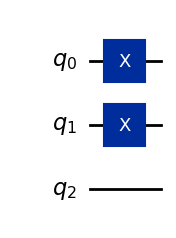

In [53]:
from qiskit.quantum_info import Statevector
from qiskit.visualization import array_to_latex, plot_state_city
# Create a simple circuit with entangled qubits
qc = QuantumCircuit(3)

qc.x(0)
qc.x(1)
#qc.h(2)

stv0 = Statevector.from_instruction(qc)
qc.draw(output="mpl", style="iqp")

<div class="alert alert-block alert-info">
<h3>Question</h3>
   <p>Which of the possible superposition states have non-zero amplitudes for this circuit?</p>
</div>

In [54]:
array_to_latex(stv0)

<IPython.core.display.Latex object>

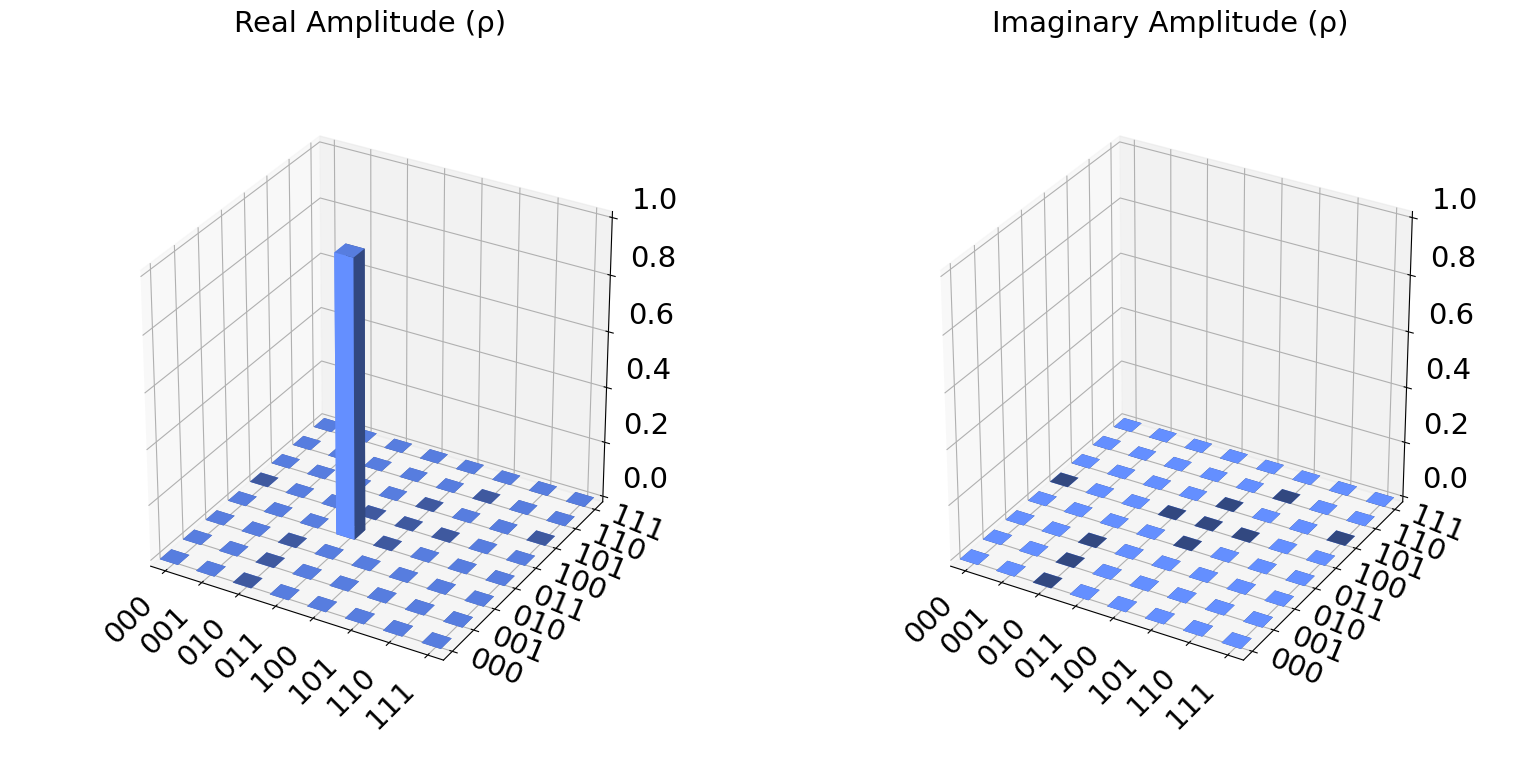

In [55]:
plot_state_city(stv0)

The indices of non-zero states can be identified by calculating the decimal number for the qubits targeted by a gate, q0 (x) and q1 (x) in this example:

$$ (q0 = 2^0 = 1) + (q1 = 2^1 = 2) = 3$$ 

Alternatively, write down the register in bit notation (taking into account the endianness):

$$ b011 = 0\cdot 2^2 + 1\cdot 2^1 + 1\cdot 2^0 = 3$$

According to our numeration starting at state 0 $\ket{0}$ it is state $\ket{3}$ or the 4th state.

Slightly more complex example with superposition involved:

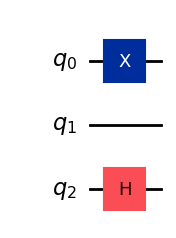

In [56]:
from qiskit.quantum_info import Statevector
from qiskit.visualization import array_to_latex, plot_state_city
# Create a simple circuit with entangled qubits
qc = QuantumCircuit(3)

qc.x(0)
#qc.x(1)
qc.h(2)

stv0 = Statevector.from_instruction(qc)
qc.draw(output="mpl", style="iqp")

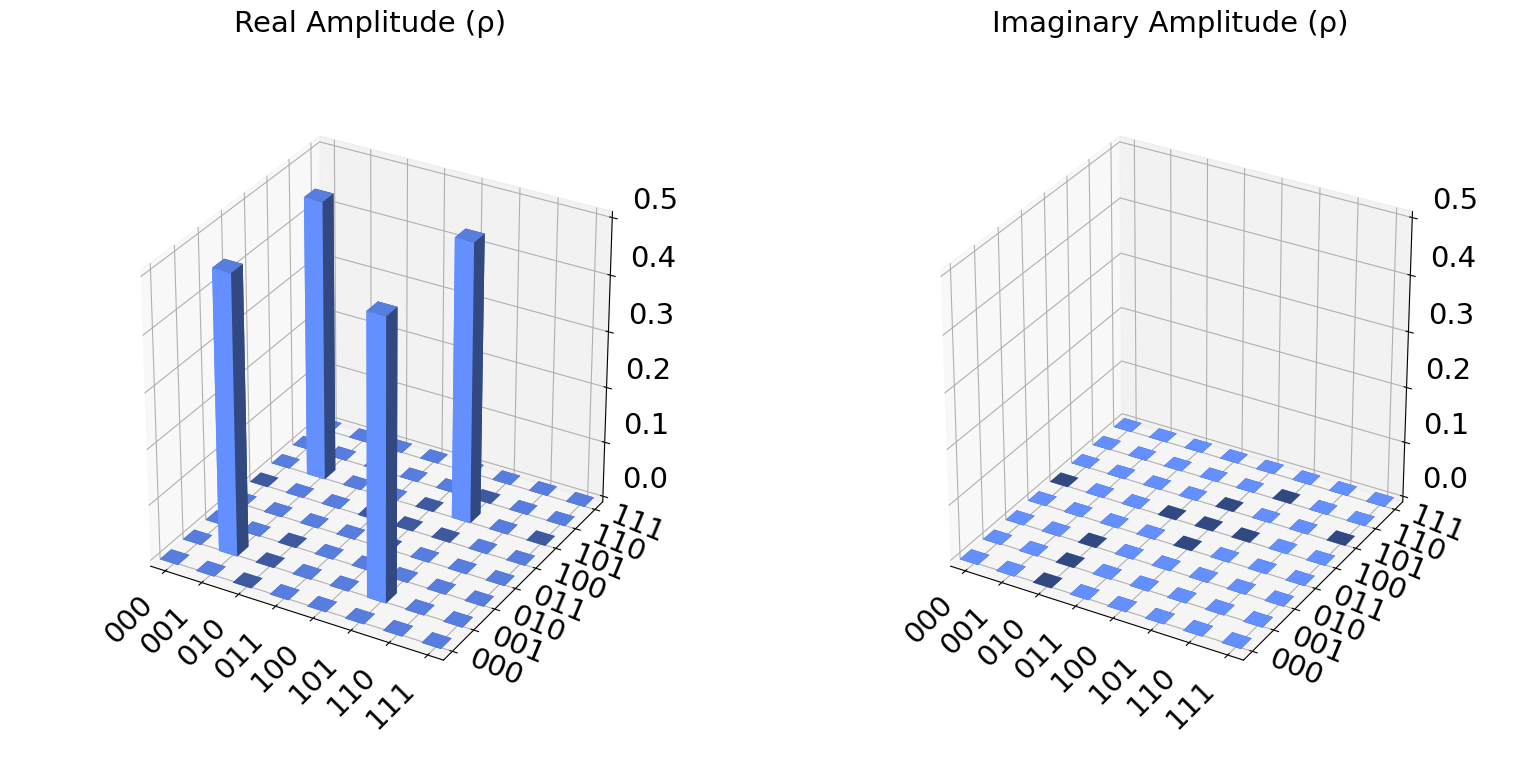

In [57]:
plot_state_city(stv0)